# Task 2: An Intelligent Tool Which Compares Boxplots
Develop a tool that compares 2 box plots and reports its findings as a story. The story summarizes the similarity of two input box plots  with respect to median, box location, IQR, maximum and minimum values that are no outlier (and maybe  also compares the reported outliers) and skewness; moreover, the tool summarizes the overall agreement / disagreement of the two boxplots.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Sample data to use for debugging
x = np.array([1,2,2,2,4,4,8,9,9,10,20,30])
y = np.array([1,2,2,2,4,4,8,9,9,10,11,12, 13,18,22,30])
x_name, y_name = 'x', 'y'

## First let's generate the boxplot visuals themselves

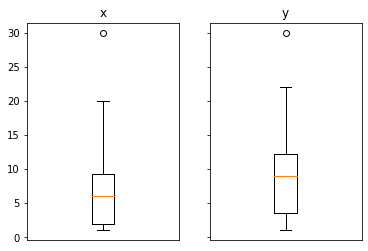

In [3]:
#now we generate our figure and boxplots therein
fig, axs = plt.subplots(1,2, sharey = True) #the figure will be called "fig", and it has 1 row and 2 columns of subplots, accessible through the "axs" object

#first boxplot
xbp = axs[0].boxplot(x) #subplot 0 is a boxplot of the data stored in variable x
axs[0].set_title(x_name) #sets the title of subplot0
axs[0].set_xticks([]) #removes the ticks along the x axis of subplot 0

#second boxplot
ybp = axs[1].boxplot(y)
axs[1].set_title(y_name)
axs[1].set_xticks([])

plt.show()

We are told that:
"Basically, the input of the tool are the following values of each boxplot:

Median1, median2:= median of each boxplot

75perc1,75perc2:= 75% percentile value of each boxplot

25perc1,25perc2:= 25% percentile value of each boxplot

max1, max2:= maximum value in each dataset from which the box plot was created which is not an outlier

min1, min2:= minimum value in each dataset from which the box plot was created which is not an outlier"



Let's format these into python variable names:

xMed, yMed - medians 

x75, y75 - 75th perentiles

x25, y25 - 25th percentiles

xMaxW, yMaxW - maximum values in each dataset from which the box plot was created, which is not an outlier

xMinW, yMinW - minimum values in each dataset from which the box plot was created, which is not an outlier

In [4]:
#lets get our variables from our data
xMed, yMed = np.median(x), np.median(y)
x75, y75 = np.percentile(x, 75), np.percentile(y, 75)
x25, y25 = np.percentile(x, 25), np.percentile(y, 25)
#let's also compute our IQRs
xIQR, yIQR = x75 - x25, y75 - y25

In [5]:
#to get our max and min whisker values, lets define a function
def whisker(data, which, whis = 1.5): # whisker, data = array, which = "upper" or "lower"
    #some conserved variables we'll use in either case
    IQR = np.percentile(data,75)-np.percentile(data,25)
    toReturn = data[0] #the value we'll eventually return
    
    if which == "upper":
        q3 = np.percentile(data,75)
        limit = min(max(data), q3+whis*IQR)
        for i in data: #find largest value less than or equal to the limit
            if i > toReturn and i <= limit:
                    toReturn = i
    elif which == "lower":
        q1 = np.percentile(data,25)
        limit = max(min(data), q1-whis*IQR)
        for i in data: #find the smallest value greater than or equal to the limit
            if i < toReturn and i >= limit:
                toReturn = i
                
    return toReturn


In [6]:
#now we'll use whisker to get xMax,yMax, xMin, yMin
xMaxW, yMaxW = whisker(x,"upper"), whisker(y, "upper")
xMinW, yMinW = whisker(x, "lower"), whisker(y, "lower")

`Note: The code above will be reused inside of function definitions below.`

Now we have all our variables.
***

## Next we will begin to perform comparisons.

### Comparing Medians
First we will compare medians using the following formula:

$medianComparisonValue = \frac{|xMedian - yMedian|}{\frac{xIQR + yIQR}{2}}$

then we will map that value to an Engilsh description term or phrase.

In [7]:
def compareMedians(x,y):
    #lets get our variables from our data
    xMed, yMed = np.median(x), np.median(y)
    x75, y75 = np.percentile(x, 75), np.percentile(y, 75)
    x25, y25 = np.percentile(x, 25), np.percentile(y, 25)
    #let's also compute our IQRs
    xIQR, yIQR = x75 - x25, y75 - y25
    medCompVal = abs(xMed - yMed)/((xIQR+yIQR)/2) #compute comparison value
    #now we map it to an English description term/phrase to return
    if medCompVal <= 0.1:
        return "more or less the same"
    elif medCompVal <= 0.25:
        return "somewhat similar"
    elif medCompVal <= 1:
        return "different"
    else: #medCompVal > 1
        return "very differnt"

### Comparing IQRs
We compare IQRs by computing the proportion of the union of the two IQRs taken up by the intersection of the two IQRs. This looks something like this:

$IQRcomparisonValue = \frac{min(max(x75 - y25, 0), max(y75 - x25,0))}{max(|x75 - y25|, |y75 - x25|)}$

then we will map that value to an English description term or phrase.

In [8]:
def compareIQRs(x,y):
    #lets get our variables from our data
    x75, y75 = np.percentile(x, 75), np.percentile(y, 75)
    x25, y25 = np.percentile(x, 25), np.percentile(y, 25)
    IQRcompVal = min(max(x75 - y25, 0), max(y75 - x25,0))/max(abs(x75 - y25), abs(y75 - x25)) #compute comparison value
    #now we map it to an English description term/phrase to return
    if IQRcompVal >= 0.9:
        return "are almost the same"
    elif IQRcompVal >= 0.75:
        return "are quite similar"
    elif IQRcompVal >= 0.25:
        return "have medium overlap"
    elif IQRcompVal >= 0.1:
        return "are dissimilar"
    else: #IQRcompVal < 0.1
        return "are very dissimilar"


### Comparing Whisker Intervals
We compare whisker intervals by computing the proporiton of the union of the two whisker intervals taken up by the intersetion of the two whisker intervals. This looks something like this:

$WIcomparisonValue = \frac{min(max(xMaxW - yMinW, 0), max(yMaxW - xMinW,0))}{max(|xMaxW - yMinW|, |yMaxW - xMinW|)}$

then we will map that value to an English description term or phrase.

In [9]:
def compareWhiskers(x,y):
    #now we'll use whisker to get xMax,yMax, xMin, yMin
    xMaxW, yMaxW = whisker(x,"upper"), whisker(y, "upper")
    xMinW, yMinW = whisker(x, "lower"), whisker(y, "lower")
    WIcompVal = min(max(xMaxW - yMinW, 0), max(yMaxW - xMinW,0))/max(abs(xMaxW - yMinW), abs(yMaxW - xMinW)) #compute comparison value
    #now we map it to an English description term/phrase to return
    WIcompDesc = "" #description term/phrase
    if WIcompVal >= 0.9:
        return "are almost the same"
    elif WIcompVal >= 75:
        return "are quite similar"
    elif WIcompVal >= 25:
        return "have medium overlap"
    elif WIcompVal >= 0.1:
        return "are dissimilar"
    else: #WIcompVal < 0.1
        return "are very dissimilar"
    

### Assessing the skewness of each boxplot
We assess the position of each median within its respective IQR by computing the following:

$skewness = \frac{median - q1}{IQR}$

then we will map that value to an English description term or phrase.

In [10]:
#lets define a function to do the mapping for us, since we'll have to do it twice anyway
def describeSkewness(data):
    median = np.median(data)
    q3 = np.percentile(data, 75)
    q1 = np.percentile(data, 25)
    IQR = q3 - q1
    skewness = (median - q1)/IQR
    #now we map it to an English description term/phrase to return
    if skewness >= 0.8: # [0.8,1]
        return "very negative"
    elif skewness >= 0.6: # [0.6,0.8)
        return "negative"
    elif skewness >= 0.525: # [0.525,0.6)
        return "slightly negative"
    elif skewness > 0.475: # (0.475,0.525)
        return "symmetric"
    elif skewness > 0.4: # (0.4, 0.475]
        return "slightly positive"
    elif skewness > 0.2: # (0.2, 0.4]
        return "positive"
    else:
        return "very positive"
        

### Assessing Outliers
To compare outliers we will produce two sets of outliers for each boxplot: lowerOutliers and upperOutliers, and then return them as a numpy array. 

In [11]:
#need to produce lowerOutliers and upperOutliers for each boxplot, so let's make a function
def outliers(data):
    #let's figure out the lowerOutliers first
    lowerOutliers = np.array([]) #empty at first
    lowerWhisker = whisker(data,"lower")
    for i in data:
        if i < lowerWhisker:
            lowerOutliers = np.append(lowerOutliers, i)
    #now let's do upperOutliers
    upperOutliers = np.array([])
    upperWhisker = whisker(data,"upper")
    for i in data:
        if i > upperWhisker:
            upperOutliers = np.append(upperOutliers, i)
    return np.array([lowerOutliers,upperOutliers], dtype=object)


To describe the outliers we will make note of the counts of each data set's lower and upper outliers. Depending on those counts we will compare the outiers of one boxplot to the outliers of the other.


In [12]:
def describeOutliers(x,y):
    #this portion will produce a string which describes the outliers
    outlierDesc = ""
    #now we make out collections of outliers
    xOutliers, yOutliers = outliers(x), outliers(y)
    #now we need to count each
    xNumLow = len(xOutliers[0])
    yNumLow = len(yOutliers[0])
    xNumUpp = len(xOutliers[1])
    yNumUpp = len(yOutliers[1])

    outlierDesc += "There are " + str(xNumLow) + " lower outliers and " + str(xNumUpp) + " upper outliers for the first boxplot, "\
        + "while the second boxplot has " + str(yNumLow) + " lower outliers and " + str(yNumUpp) + " upper outliers.\n"

    #compare lower outliers
    if xNumLow > 0 and yNumLow > 0: #can only compare if they're non-zero
        xLowHigh = max(xOutliers[0])
        xLowLow = min(xOutliers[0])
        yLowHigh = max(yOutliers[0])
        yLowLow = min(yOutliers[0])
        #both have multiple lower outliers
        if xNumLow > 1 and yNumLow > 1: #calculate % of their overlap
            overlapPercent = 100*min(max(xLowHigh-yLowLow, 0),max(yLowHigh-xLowLow, 0))/max(xLowHigh-yLowLow, yLowHigh-xLowLow)
            outlierDesc += "The lower outliers overlap " + str(round(overlapPercent,2)) +"%."
        #x has multiple lower outliers but y has only 1
        elif xNumLow > 1 and yNumLow == 1: #see if the outlier falls in the range of the others
            yLowerOutlier = yOutliers[0][0]
            outlierDesc += "The second boxplot's only lower outlier "
            if xLowLow <= yLowerOutlier and yLowerOutlier <= xLowHigh:
                outlierDesc += "falls "
            else:
                outlierDesc += "doesn't fall "
            outlierDesc += "within the first boxplot's lower outliers' range.\n"
        #x has only 1 outlier, but y has multiple
        elif xNumLow == 1 and yNumLow > 1:
            xLowerOutlier = xOutliers[0][0]
            outlierDesc += "The first boxplot's only lower outlier "
            if yLowLow <= xLowerOutlier and xLowerOutlier <= yLowHigh:
                outlierDesc += "falls "
            else:
                outlierDesc += "doesn't fall "
            outlierDesc += "within the second boxplot's lower outliers' range.\n"         
        #they both have only 1 lower outlier
        else: #xNumLow == 1 and yNumLow == 1
            #they're the same value
            if xOutliers[0][0] == yOutliers[0][0]:
                outlierDesc += "Both have the same lower outlier.\n"
            #both are in 1 std of each other
            elif (yOutliers[0][0] < xOutliers[0][0] + np.std(x) or yOutliers[0][0] > xOutliers[0][0] - np.std(x)) and \
            (xOutliers[0][0] < yOutliers[0][0] + np.std(y) or xOutliers[0][0] > yOutliers[0][0] - np.std(y)):
                outlierDesc += "Both lower outliers fall within one of each others' standard deviation.\n"
            #the first's is within 1 std of the second's
            elif (xOutliers[0][0] < yOutliers[0][0] + np.std(y) or xOutliers[0][0] > yOutliers[0][0] - np.std(y)):
                outlierDesc += "The first boxplot's only lower outlier is within a single standard deviation of the second boxplot's"\
                    + " only lower outlier, but the second boxplot's only lower outlier is not within a single standard deviation "\
                    + "of the first boxplot's only lower outlier.\n"
            #the second's is within 1 std of the first's
            elif (yOutliers[0][0] < xOutliers[0][0] + np.std(x) or yOutliers[0][0] > xOutliers[0][0] - np.std(x)):
                outlierDesc += "The second boxplot's only lower outlier is within a single standard deviation of the first boxplot's"\
                    + " only lower outlier, but the first boxplot's only lower outlier is not within a single standard deviation "\
                    + "of the second boxplot's only lower outlier.\n"
            #neither are within a std of the other
            else:
                outlierDesc += "Neither lower outlier is within a standard deviation of the other's.\n"
        
    #compare upper outliers
    if xNumUpp > 0 and yNumUpp > 0: #can only compare if they're non-zero
        xUppHigh = max(xOutliers[1])
        xUppLow = min(xOutliers[1])
        yUppHigh = max(yOutliers[1])
        yUppLow = min(yOutliers[1])
        #both have multiple upper outliers
        if xNumUpp > 1 and yNumUpp > 1: #calculate % of their overlap
            overlapPercent = 100*min(max(xUppHigh-yUppLow, 0),max(yUppHigh-xUppLow, 0))/max(xUppHigh-yUppLow, yUppHigh-xUppLow)
            outlierDesc += "The upper outliers overlap " + str(round(overlapPercent,2)) +"%."
        #x has multiple upper outliers but y has only 1
        elif xNumUpp > 1 and yNumUpp == 1: #see if the outlier falls in the range of the other's
            yUpperOutlier = yOutliers[1][0]
            outlierDesc += "The second boxplot's only upper outlier "
            if xUppLow <= yUpperOutlier and yUpperOutlier <= xUppHigh:
                outlierDesc += "falls "
            else:
                outlierDesc += "doesn't fall "
            outlierDesc += "within the first boxplot's upper outliers' range.\n"
        #x has only 1 outlier, but y has multiple
        elif xNumUpp == 1 and yNumUpp > 1:
            xUpperOutlier = xOutliers[1][0]
            outlierDesc += "The first boxplot's only upper outlier "
            if yUppLow <= xUpperOutlier and xUpperOutlier <= yUppHigh:
                outlierDesc += "falls "
            else:
                outlierDesc += "doesn't fall "
            outlierDesc += "within the second boxplot's upper outliers' range.\n"         
        #they both have only 1 upper outlier
        else: #xNumUpp == 1 and yNumUpp == 1
            #they're the same value
            if xOutliers[1][0] == yOutliers[1][0]:
                outlierDesc += "Both have the same upper outlier.\n"
            #both are in 1 std of each other
            elif (yOutliers[1][0] < xOutliers[1][0] + np.std(x) or yOutliers[1][0] > xOutliers[1][0] - np.std(x)) and \
            (xOutliers[1][0] < yOutliers[1][0] + np.std(y) or xOutliers[1][0] > yOutliers[1][0] - np.std(y)):
                outlierDesc += "Both upper outliers fall within one of each others' standard deviation.\n"
            #the first's is within 1 std of the second's
            elif (xOutliers[1][0] < yOutliers[1][0] + np.std(y) or xOutliers[1][0] > yOutliers[1][0] - np.std(y)):
                outlierDesc += "The first boxplot's only upper outlier is within a single standard deviation of the second boxplot's"\
                    + " only upper outlier, but the second boxplot's only upper outlier is not within a single standard deviation "\
                    + "of the first boxplot's only upper outlier.\n"
            #the second's is within 1 std of the first's
            elif (yOutliers[1][0] < xOutliers[1][0] + np.std(x) or yOutliers[1][0] > xOutliers[1][0] - np.std(x)):
                outlierDesc += "The second boxplot's only upper outlier is within a single standard deviation of the first boxplot's"\
                    + " only upper outlier, but the first boxplot's only upper outlier is not within a single standard deviation "\
                    + "of the second boxplot's only upper outlier.\n"
            #neither are within a std of the other
            else:
                outlierDesc += "Neither upper outlier is within a standard deviation of the other's.\n"

    return outlierDesc

## Let's make the tool
Now we will package everything above into one function!

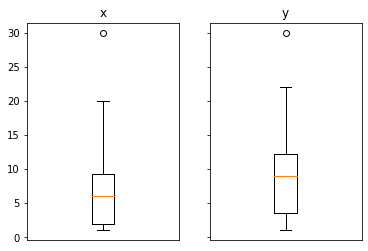

Basic stats for x:
Upper Whisker: 20
Q3: 9.25
Median: 6.0
Q1: 2.0
IQR: 7.25
Lower Whisker: 1

Basic stats for y:
Upper Whisker: 22
Q3: 12.25
Median: 9.0
Q1: 3.5
IQR: 8.75
Lower Whisker: 1


Summary:
The medians are different.
The two IQRs have medium overlap.
The two whisker intervals are almost the same.
The skewness of x is slightly negative, while the skewness of y is negative.
There are 0 lower outliers and 1 upper outliers for the first boxplot, while the second boxplot has 0 lower outliers and 1 upper outliers.
Both have the same upper outlier.



In [13]:
def compareBoxplots(x, x_name, y, y_name):
    #first it will produce the boxplots
    #now we generate our figure and boxplots therein
    fig, axs = plt.subplots(1,2, sharey = True) #the figure will be called "fig", and 2 axs
    #first boxplot
    xbp = axs[0].boxplot(x) #subplot 0 is a boxplot of the data stored in variable x
    axs[0].set_title(x_name) #sets the title of subplot0
    axs[0].set_xticks([]) #removes the ticks along the x axis of subplot 0
    #second boxplot
    ybp = axs[1].boxplot(y)
    axs[1].set_title(y_name)
    axs[1].set_xticks([])
    plt.show()
    
    #lets get our variables from our data
    xMed, yMed = np.median(x), np.median(y)
    x75, y75 = np.percentile(x, 75), np.percentile(y, 75)
    x25, y25 = np.percentile(x, 25), np.percentile(y, 25)
    #let's also compute our IQRs
    xIQR, yIQR = x75 - x25, y75 - y25
    #now we'll use whisker to get xMax,yMax, xMin, yMin
    xMaxW, yMaxW = whisker(x,"upper"), whisker(y, "upper")
    xMinW, yMinW = whisker(x, "lower"), whisker(y, "lower")
    #now we print all this info
    #first for x
    print("\033[1m" + "Basic stats for " + x_name + ":")
    print("\033[0m" + "Upper Whisker:", xMaxW)
    print("Q3:", x75)
    print("Median:", xMed)
    print("Q1:", x25)
    print("IQR:",xIQR)
    print("Lower Whisker: " + str(xMinW) + "\n")
    #now for y
    print("\033[1m" + "Basic stats for " + y_name + ":")
    print("\033[0m" + "Upper Whisker:", yMaxW)
    print("Q3:", y75)
    print("Median:", yMed)
    print("Q1:", y25)
    print("IQR:",yIQR)
    print("Lower Whisker: " + str(yMinW) + "\n")
    
    print("\033[1m" + "\nSummary:")    
    #now we compare medians
    print("\033[0m" + "The medians are ", compareMedians(x,y), ".", sep = "")
    
    #now we compare IQRs
    print("The two IQRs ", compareIQRs(x,y), ".", sep = "")
    
    #now we compare whisker intervals
    print("The two whisker intervals ", compareWhiskers(x,y), ".", sep = "")
    
    #now we describe skewness
    xSkewness, ySkewness = describeSkewness(x), describeSkewness(y)
    if xSkewness == ySkewness:
        print("Both x and y have a skewness which is ", xSkewness, ".", sep = "")
    else:
        print("The skewness of x is ", xSkewness, ", while the skewness of y is ", ySkewness, ".", sep = "")
        
    #now we describe outliers
    print(describeOutliers(x,y))
    
    
compareBoxplots(x,x_name,y,y_name)

## Using the tool on the three example data sets

### Data Set 1:

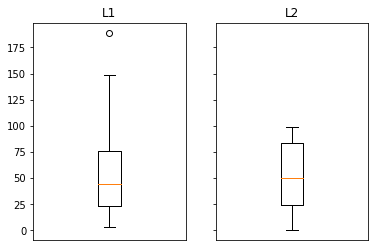

Basic stats for L1:
Upper Whisker: 149
Q3: 75.75
Median: 44.0
Q1: 23.25
IQR: 52.5
Lower Whisker: 3

Basic stats for L2:
Upper Whisker: 99
Q3: 83.75
Median: 50.5
Q1: 24.5
IQR: 59.25
Lower Whisker: 0


Summary:
The medians are somewhat similar.
The two IQRs are quite similar.
The two whisker intervals are dissimilar.
The skewness of x is positive, while the skewness of y is slightly positive.
There are 0 lower outliers and 1 upper outliers for the first boxplot, while the second boxplot has 0 lower outliers and 0 upper outliers.



In [14]:
L1 =  [18,  58,  22,  50,  44,  64,  68,  10,  58,   6,  82,  42,  39,  26,  18,  44,  80,  26,  59,  35,  20, 81,  23,  77,  18,  72,  24,  3,  30,  81, 189, 149, 109, 139]
L2 = [58, 98, 90, 93, 55, 14, 15, 94, 33, 84, 26, 29, 98, 22, 24, 47, 52, 51, 71, 48, 83, 15, 0, 50, 99, 20, 21, 85, 57, 49]
compareBoxplots(L1, "L1", L2, "L2")

### Data Set 2:

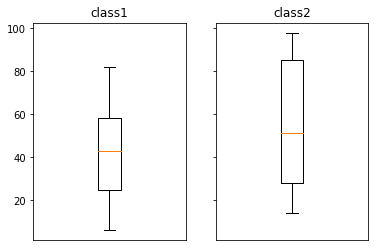

Basic stats for class1:
Upper Whisker: 82
Q3: 58.25
Median: 43.0
Q1: 25.0
IQR: 33.25
Lower Whisker: 6

Basic stats for class2:
Upper Whisker: 98
Q3: 85.5
Median: 51.5
Q1: 28.25
IQR: 57.25
Lower Whisker: 14


Summary:
The medians are somewhat similar.
The two IQRs have medium overlap.
The two whisker intervals are dissimilar.
The skewness of x is slightly negative, while the skewness of y is slightly positive.
There are 0 lower outliers and 0 upper outliers for the first boxplot, while the second boxplot has 0 lower outliers and 0 upper outliers.



In [15]:
class1 = [18, 58, 22, 50, 44, 64, 68, 10, 58, 6, 82, 42, 39, 26, 18, 44, 80, 26, 59, 35]
class2 = [58, 98, 90, 93, 55, 14, 15, 94, 33, 84, 26, 29, 98, 22, 24, 47, 52, 51, 71, 48]
compareBoxplots(class1, "class1", class2, "class2")


### Data Set 3:

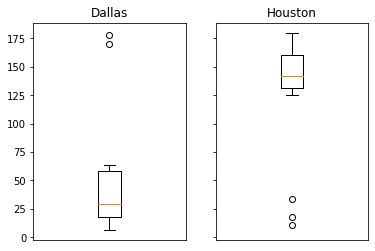

Basic stats for Dallas:
Upper Whisker: 64
Q3: 58.0
Median: 29.0
Q1: 18.0
IQR: 40.0
Lower Whisker: 6

Basic stats for Houston:
Upper Whisker: 180
Q3: 160.0
Median: 142.0
Q1: 131.25
IQR: 28.75
Lower Whisker: 125


Summary:
The medians are very differnt.
The two IQRs are very dissimilar.
The two whisker intervals are very dissimilar.
Both x and y have a skewness which is positive.
There are 0 lower outliers and 2 upper outliers for the first boxplot, while the second boxplot has 3 lower outliers and 0 upper outliers.



In [16]:
Dallas = [18, 58, 22, 50, 44, 64, 14, 15, 58, 6, 26, 29, 26, 18, 44, 178, 170]
Houston = [149, 180, 165, 166, 147, 171, 154, 125, 136, 162, 141, 139, 131, 132, 143, 11, 34, 18]
compareBoxplots(Dallas, "Dallas", Houston, "Houston")